In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

from collections import Counter

from tqdm.notebook import tqdm

In [283]:
KRATICE = {'admin', 'agr', 'akad', 'anal', 'anat', 'ant', 'antrop', 'aor', 'arh', 'arheol', 'arhit', 'astron', 'augm', 'autom', 'bank', 'bibl', 'biol', 'bl', 'bot', 'br', 'bud', 'burz', 'crkv', 'čest', 'čit', 'dem', 'dijal', 'dipl', 'dosl', 'dr', 'ekol', 'ekon', 'engl', 'enkl', 'etn', 'etnol', 'eufem', 'fam', 'farm', 'fil', 'filat', 'film', 'fiz', 'fiziol', 'fon', 'fr', 'g', 'gener', 'genet', 'geod', 'geogr', 'geol', 'gl', 'gl', 'glazb', 'god', 'gosp', 'gov', 'građ', 'graf', 'gram', 'hidr', 'hind', 'hip', 'hrv', 'ideol', 'im', 'imp', 'impf', 'indiv', 'inform', 'ing', 'int', 'iron', 'isl', 'itd', 'izg', 'izv', 'jud', 'kajk', 'kalk', 'kat', 'kazal', 'kem', 'kinol', 'knjiš', 'knjiž', 'komp', 'krat', 'kršć', 'kulin', 'l', 'lik', 'lingv', 'log', 'lokal', 'lov', 'm', 'mat', 'med', 'metaf', 'meteor', 'meton', 'mil', 'min', 'mit', 'mlrd', 'mons', 'musl', 'nar', 'neob', 'neodr', 'neol', 'nesvrš', 'neutr', 'npr', 'odn', 'odr', 'onom', 'opr', 'op', 'orij', 'pat', 'pčel', 'pejor', 'pleon', 'poč', 'podr', 'poet', 'po', 'pol', 'pom', 'pom', 'posl', 'posr', 'potenc', 'pov', 'pov', 'pr', 'pravn', 'pravosl', 'pren', 'prez', 'prid', 'prid', 'prid', 'prij', 'pr', 'pril', 'pril', 'pril', 'priv', 'prom', 'prof', 'psih', 'publ', 'r', 'razg', 'razr', 'red', 'refer', 'reg', 'rel', 'retor', 'rib', 'rij', 'rn', 'rud', 'slav', 'slov', 'služb', 'sociol', 'sred', 'srp', 'stan', 'stom', 'st', 'str', 'supl', 'sv', 'svrš', 'tehn', 'teol', 'term', 'tj', 'tipogr', 'tisk', 'top', 'trg', 'tzv', 'umj', 'usp', 'uzv', 'v', 'vet', 'vezn', 'vlč', 'vojn', 'vulg', 'zam', 'zast', 'zb', 'zn', 'znanstv', 'zool', 'ž', 'žarg'}

In [7]:
ROOT_URL = "https://slobodnadalmacija.hr"

def scrap_page(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content)

    data = {"url": url,
            "title": "",
            "content": "",
            "urls": set()}

    # scrap title
    h1 = soup.find("h1")
    if h1:
        data["title"] = h1.text.strip()

    # scrap content
    text = []
    div = soup.find("div", class_="itemFullText")
    if div:
        for p in div.find_all("p"):
            text.append(p.text.strip())
        data["content"] = "\n".join(text)

    # scrap urls
    for a in soup.find_all("a", class_="card__article-link"):
        if a["href"].startswith("http"):
            data["urls"].add(a["href"])
        else:
            data["urls"].add(ROOT_URL + a["href"])

    return data
    
root_data = scrap_page(ROOT_URL)
root_data

{'url': 'https://slobodnadalmacija.hr',
 'title': 'Slobodna Dalmacija',
 'content': '',
 'urls': {'https://dubrovacki.slobodnadalmacija.hr/dubrovnik/zupanija/dubrovnik/dubrovacki-vatrogasci-zoran-grljevic-i-zeljko-jelaska-o-6-prosincu-1991-kad-su-poginuli-nino-andro-i-teo-suze-nisu-imale-kad-teci-trebalo-je-gasiti-grad-1246200',
  'https://slobodnadalmacija.hr/dalmacija/obala/americki-agenti-u-tajnosti-stigli-u-trogir-i-pretresli-jahtu-ukrajinskog-princa-tame-nekoc-mocni-oligarh-putinov-je-bliski-prijatelj-a-zelenski-mu-je-ozbiljno-pomrsio-planove-1244801',
  'https://slobodnadalmacija.hr/dalmacija/obala/cuvao-je-leda-titu-i-tudmanu-a-kao-umirovljenik-tuce-lijep-honorar-na-racun-gradana-cije-komunalce-uci-o-sigurnosti-doznajemo-sve-o-novom-savjetniku-makarske-vlasti-1246226',
  'https://slobodnadalmacija.hr/dalmacija/obala/jos-dva-popularna-dalmatinska-soping-centra-evakuirana-zbog-dojave-o-bombi-velike-guzve-stvaraju-se-na-prometnicama-policajci-cesljaju-prostore-u-potrazi-za-eksplozi

In [8]:
dataset = []
visited_urls = {ROOT_URL}

prev_urls = root_data["urls"]
next_urls = set()
for url in tqdm(prev_urls):
    data = scrap_page(url)
    dataset.append(data)
    next_urls.update(data["urls"])
next_urls -= visited_urls

print(len(next_urls))


  0%|          | 0/119 [00:00<?, ?it/s]

172


In [9]:
df = pd.DataFrame(dataset).drop("urls", axis=1)

df

,url,title,content
0,https://slobodnadalmacija.hr/split/znamo-da-sp...,"Znamo da Split nije New York, ali atmosfera u ...",Za točno tri tjedna čestitat ćemo jedni drugim...
1,https://slobodnadalmacija.hr/vijesti/crna-kron...,LIVEPotraga je trajala cijelu noć: policija pr...,Ključni trenutci:\n► Splitska policija izvijes...
2,https://slobodnadalmacija.hr/sport/strani-nogo...,Španjolska Marca tvrdi: Gotovo je! Cristiano R...,Stigao je kraj nagađanjima i čini se da je Cri...
3,https://slobodnadalmacija.hr/split/strani-dose...,Strani doseljenici u Split u samo par dana sku...,Premda većina Splićana doživljava ulične mačke...
4,https://slobodnadalmacija.hr/dalmacija/zagora/...,Sinjanin kod kuće imao improvizirani laborator...,Policijski službenici PP Sinj dovršili su krim...
...,...,...,...
114,https://slobodnadalmacija.hr/dalmacija/obala/a...,Američki agenti u tajnosti stigli u Trogir i p...,"Luksuzna jahta ukrajinskog oligarha, bivšeg uk..."
115,https://slobodnadalmacija.hr/dubrovnik/vijesti...,Sačekuša u kafiću! Pogledajte snimku munjevito...,"Slađan B. (40), po zanimanju zidar rodom iz Tr..."
116,https://zadarski.slobodnadalmacija.hr/zadar/zd...,"Ekipa iz Sali i članovi Udruge ""Pojonsko srce""...",- Slomili smo se za slikavanje! Nema ‘ko nas n...
117,https://slobodnadalmacija.hr/vijesti/biznis/u-...,"U dm-u božićnica preko 11.000 kuna, a hrvatski...","Već smo dobro zakoračili u prosinac, mjesec ka..."


In [123]:
content = []
for cnt in df.content:
    content.extend(cnt.split("\n"))

content = "\n".join(content)

def split_sents(content):
    n = len(content)
    i = j = 0
    sents = []
    while j < n:
        if content[j] in ".?!" and 2 < j < n - 2:
            a, b, _, c, d = content[j-2:j+3]
            if not b.isspace() and c.isspace() and (d.isupper() or d in ".?!" or not d.isalpha()):
                while j < n and content[j] in ".?!":
                    j += 1
                sent = content[i:j + 1].strip()
                sents.append(sent)
                i = j + 1
        j = j + 1
    return sents
     
sents = split_sents(content)

for sent in sents:
    toks = []
    for tok in sent.split():
        toks += split_token(tok)
    print(" ".join(toks))

Za točno tri tjedna čestitat ćemo jedni drugima Božić , a iako smo danas upalili drugu adventsku svijeću , atmosfera u Splitu daleko je od božićne .
Barem ako je suditi prema fotografijama koje je zabilježio naš vrijedni fotograf Jakov Prkić .
U redu , jasno nam je da su zbog kiše Splićani dobrim dijelom nedjelju proveli u svojim domovima , ali da je grad tako loše okićen , a Božić je pred vratima i nije nam najjasnije .
Od božićnog ugođaja ni B , pa stoga ni ne čudi što mnogi Dalmatinci upravo u ovo predblagdansko vrijeme odlaze posjetiti Zagreb u kojem je Advent nekoliko godina zaredom proglašen najboljim u Europi .
Tamo barem božićnih ukrasa ima u izobilju ...
Fotografije Splita druge adventske nedjelje pogledajte u nastavku .
Split druge adventske nedjelje Split druge adventske nedjelje Split druge adventske nedjelje Ključni trenutci : ► Splitska policija izvijestila je kako je noćas u 00:50 sati teško ozlijeđen 20-godišnji policijski službenik kojeg je muškarac udario automobilom 

In [122]:
def split_while_not_alnum(token, reverse=False):
    if reverse:
        token = token[::-1]

    i, n = 0, len(token)

    parts = []
    left = ""
    while i < n and not token[i].isalnum():
        if not left:
            left = token[i]
        elif left[-1] == token[i]:
            left += token[i]
        else:
            parts.append(left)
            left = token[i]
        i += 1
    if left:
        parts.append(left)
    
    if i < n:
        parts.append(token[i:]) 

    if reverse:
        parts[-1] = parts[-1][::-1]
        return parts[::-1]
    return parts

def split_token(token):
    lefts = split_while_not_alnum(token, reverse=False)
    if lefts[-1][0].isalnum():
        token = lefts.pop()
        rights = split_while_not_alnum(token, reverse=True)
        lefts += rights
    return lefts


split_token("+++keks!!!")

['+++', 'keks', '!!!']

In [22]:
def tok2shape(tok):
    shape = ""
    prev = ""
    for ch in tok:
        if ch.isalpha():
            ch = "X" if ch.isupper() else "x"
        elif ch.isdigit():
            ch = "d"

        if ch != prev:
            shape += ch
            prev = ch

    return shape

tokens = []
shapes = []
for content in df.content:
    for sent in content.split("\n"):
        for w in sent.split():
            shapes.append(tok2shape(w))
            tokens.append(w)

Counter(shapes).most_common()


[('x', 55926),
 ('Xx', 6500),
 ('x,', 3361),
 ('x.', 2472),
 ('Xx,', 1168),
 ('Xx.', 522),
 ('X', 518),
 ('d.', 438),
 ('d', 359),
 ('-', 350),
 ('"Xx', 234),
 ('–', 190),
 ('x:', 157),
 ('Xd', 155),
 ('x?', 124),
 ('x",', 95),
 ('x-x', 85),
 ('d-x', 70),
 ('X-x', 64),
 ('x"', 59),
 ('“Xx', 59),
 ('d.d', 58),
 ('(x', 55),
 ('x!', 54),
 ('"x', 48),
 ('Xx-x', 47),
 ('‘Xx', 42),
 ('"Xx"', 42),
 ('X.', 41),
 ('d,d', 40),
 ('Xx:', 34),
 ('XxXx', 34),
 ('x".', 33),
 ('d:d', 32),
 ('X,', 31),
 ('x)', 31),
 ('"x"', 30),
 ('“x', 30),
 ('x”,', 29),
 ('x”', 29),
 ('Xx"', 28),
 ('(Xx', 27),
 ('„Xx', 27),
 ('X-x,', 26),
 ('d.,', 24),
 ('‘x', 23),
 ('"Xx",', 21),
 ('‘x‘', 20),
 ('Xx",', 20),
 ('“Xx”', 20),
 ('X:', 20),
 ('x;', 19),
 ('Xx?', 19),
 ('x‘,', 18),
 ('x."', 17),
 ('Xx-Xx', 16),
 ('x),', 16),
 ('x/x', 16),
 ('d,', 16),
 ('X-x.', 15),
 ('(x)', 14),
 ('Xx/Xx', 14),
 ('x‘.', 14),
 ('XxXx,', 13),
 ('“x”', 13),
 ('(x)x', 13),
 ('x,"', 13),
 ('x,x', 13),
 ('►', 12),
 ('Xx”', 12),
 ('Xx)', 12),
 

In [100]:
len(tokens), len(set(tokens))

(60534, 15059)

In [284]:



def _find_sent_start_indices(text):
    pattern = re.compile(r"([^\s.!?]+)([.!?]*)(\s+)(\S+)")

    sent_start_indices = []
    idx = 0
    while text:
        match = re.search(pattern, text)
        if match:
            prev_w, dots, space, next_w = match.groups()
        
            is_stop = ((space[0] == "\n") or  # novi red
                       (dots and 
                        not prev_w.lower() in KRATICE 
                        and ((next_w[0].isalpha() and next_w[0].isupper()) or (not next_w[0].isalpha()))))  # 

            # print(">>", "OK" if is_stop else "", repr(dots), repr("".join(match.groups())))
            start = match.start(3)
            idx += start
            if is_stop: 
                sent_start_indices.append(idx)
            text = text[start:]
        else:
            break
    return sent_start_indices


def split_by_indices(text, indices):
    sents = []
    i = 0
    for j in indices:
        sent = text[i:j].strip()
        if sent:
            sents.append(sent)
        i = j + 1
    if i < len(sents) - 1:
        sents.append(text[i:])
    return sents

sent_start_indices = _find_sent_start_indices(content) 
sents = split_by_indices(content, sent_start_indices)

for sent in sents:
    print(sent)

Za točno tri tjedna čestitat ćemo jedni drugima Božić, a iako smo danas upalili drugu adventsku svijeću, atmosfera u Splitu daleko je od božićne.
Barem ako je suditi prema fotografijama koje je zabilježio naš vrijedni fotograf Jakov Prkić.
U redu, jasno nam je da su zbog kiše Splićani dobrim dijelom nedjelju proveli u svojim domovima, ali da je grad tako loše okićen, a Božić je pred vratima i nije nam najjasnije.
Od božićnog ugođaja ni B, pa stoga ni ne čudi što mnogi Dalmatinci upravo u ovo predblagdansko vrijeme odlaze posjetiti Zagreb u kojem je Advent nekoliko godina zaredom proglašen najboljim u Europi.
Tamo barem božićnih ukrasa ima u izobilju...
Fotografije Splita druge adventske nedjelje pogledajte u nastavku.
Split druge adventske nedjelje
Split druge adventske nedjelje
Split druge adventske nedjelje
Ključni trenutci:
► Splitska policija izvijestila je kako je noćas u 00:50 sati teško ozlijeđen 20-godišnji policijski službenik kojeg je muškarac udario automobilom.
► Tijekom da

In [285]:
for sent in sents:
    tokens = []
    for token in sent.split():
        tokens += split_token(token)
    print(" ".join(tokens))



Za točno tri tjedna čestitat ćemo jedni drugima Božić , a iako smo danas upalili drugu adventsku svijeću , atmosfera u Splitu daleko je od božićne .
Barem ako je suditi prema fotografijama koje je zabilježio naš vrijedni fotograf Jakov Prkić .
U redu , jasno nam je da su zbog kiše Splićani dobrim dijelom nedjelju proveli u svojim domovima , ali da je grad tako loše okićen , a Božić je pred vratima i nije nam najjasnije .
Od božićnog ugođaja ni B , pa stoga ni ne čudi što mnogi Dalmatinci upravo u ovo predblagdansko vrijeme odlaze posjetiti Zagreb u kojem je Advent nekoliko godina zaredom proglašen najboljim u Europi .
Tamo barem božićnih ukrasa ima u izobilju ...
Fotografije Splita druge adventske nedjelje pogledajte u nastavku .
Split druge adventske nedjelje
Split druge adventske nedjelje
Split druge adventske nedjelje
Ključni trenutci :
► Splitska policija izvijestila je kako je noćas u 00:50 sati teško ozlijeđen 20-godišnji policijski službenik kojeg je muškarac udario automobilom 

In [286]:
all_tokens = []
for sent in sents:
    all_tokens += sent.split()

len(all_tokens), len(set(all_tokens))

(75004, 23799)

In [293]:
counter = Counter(all_tokens)



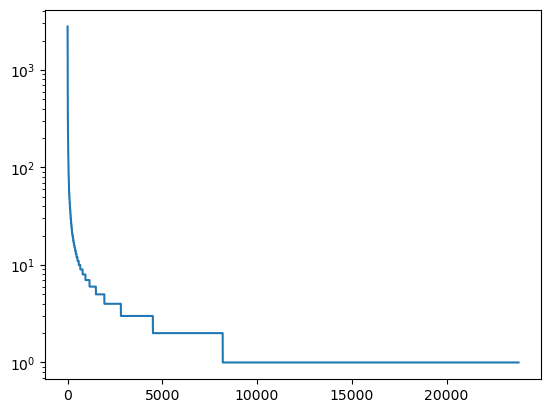

In [300]:
import matplotlib.pyplot as plt

freqs = [f for _, f in counter.most_common()]

plt.yscale("log")
plt.plot(sorted(counter.values(), reverse=True))

In [304]:
data = []
for sent in sents:
    if len(sent.split()) == 107:
        print(sent)
        print()
    data.append(len(sent.split()))

pd.DataFrame(data).describe()

Koliko god se profesorica trudila, lijenu se jedanaestogodišnjakinju nije moglo natjerati da uzme lektiru, čak ni onu najlakšu, nekoliko stranica Puškinove prerade stare narodne priče o ribarovoj ženi, starici iz uboge kolibe od gline, koja se uzoholila i od zlatne ribice tražila sve objesniju raskoš i moć, malo-pomalo, od novog korita i kuće, do kraljevstva, dvorova, kočija i slugu, i čudesno joj morsko biće sve ispunilo, dok glupača na koncu nije poželjela biti carica mora kojoj će zlatna ribica služiti, a zlatna ribica se na to naljutila i oduzela joj sve što je prethodno dala, vratila je na početak, resetirala blesavu babetinu natrag u zaostalost i bijedu.

Zaposlenici, uz spomenutu božićnicu, imaju i zajamčena prava poput regresa, pomoći rodiljama za drugih šest mjeseci rodiljinog dopusta u iznosu od 1.200 kuna mjesečno, pomoći za rođenje i/ili posvojenje djeteta u visini od 10.000 kuna, dara za djecu zaposlenicima koji imaju djecu s poteškoćama u razvoju u iznosu od 3.000 kuna br

,0
count,4166.000000
mean,18.003841
std,13.154671
min,1.000000
25%,8.000000
50%,16.000000
75%,26.000000
max,107.000000
